In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('movie_data.csv')
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [3]:
df.shape

(49969, 2)

In [4]:
df=df.sample(frac=1)
df=df[0:1000]
df.head()

,review,sentiment
2608,"But a great cast! Jonathan Pryce, Kathy Bates,...",1
11048,I am dumbfounded that I actually sat and watch...,0
17041,"The superb star quality of Gerard Philipe, who...",1
28515,A very well made film set in early '60s commun...,1
8650,"Definitely not your typical Polizia, Redneck j...",0


In [5]:
df.shape

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2608 to 41167
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [7]:
df.describe()

,sentiment
count,1000.000000
mean,0.512000
std,0.500106
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'countplot of sentiment')

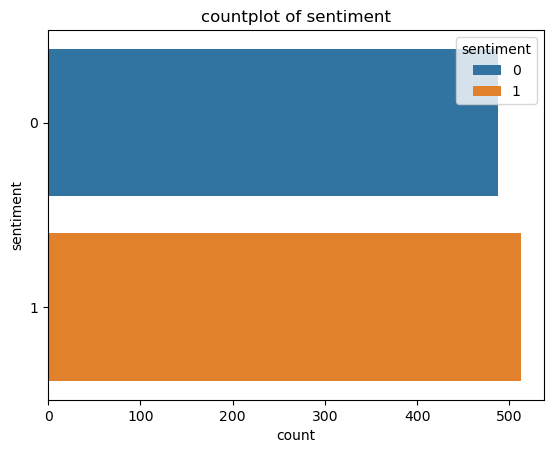

In [9]:
sns.countplot(df,y='sentiment',hue='sentiment')
plt.ylabel('sentiment')
plt.title('countplot of sentiment')

In [10]:
for i in range(5):
    print(df['review'].iloc[i],'-', df['sentiment'].iloc[i])
    print()

But a great cast! Jonathan Pryce, Kathy Bates, Rupert Everett, Lynne Redgrave, Julie Andrews and Dan Aykroyd! And that's just the beginning.<br /><br />I'm not totally sure that any description of the movie and plot are going to entice you to watch this one. Suffice it to say that it has something for practically everyone: death, singing, a sparkly suit, cell phones, a little person (nice looking woman, actually), a drawbridge (modern, not Medieval), a boombox, and a crossbow. Oh, and a psychotic. And Barry Manilow.<br /><br />You will have to trust me when I say that 50% of you out there will hate this movie because of the lack of the Absurd Gene in your DNA makeup. It's not your fault; it's hereditary. The other 50% of you will probably want to change the channel after 20 minutes, but you HAVE TO KEEP WATCHING.<br /><br />Even at that, at the end you may wonder why you watched... but keep in mind that absurdity thing. It should grow on you. It is a test. - 1

I am dumbfounded that I 

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def preprocess(sentence):
    sentence=re.sub(r"[^a-zA-Z0-9]"," ",sentence)
    words=word_tokenize(sentence)
    cleaned_words=[
    lemma.lemmatize(word.lower())
    for word in words
    if word.lower() not in stop_words]

    return " ".join(cleaned_words)

df['review']=df['review'].apply(preprocess)
    

In [12]:
for i in range(5):
    print(df['review'].iloc[i],'-',df['sentiment'].iloc[i])
    print()


great cast jonathan pryce kathy bates rupert everett lynne redgrave julie andrew dan aykroyd beginning br br totally sure description movie plot going entice watch one suffice say something practically everyone death singing sparkly suit cell phone little person nice looking woman actually drawbridge modern medieval boombox crossbow oh psychotic barry manilow br br trust say 50 hate movie lack absurd gene dna makeup fault hereditary 50 probably want change channel 20 minute keep watching br br even end may wonder watched keep mind absurdity thing grow test - 1

dumbfounded actually sat watched love independent film horror film whole zombie thing general add ninga crossed line never crossed hope people movie great time making least total waste never know watching though script kidding acting think even tree faking cinematography well must camera period think actual planning involved making movie total waste time prolong commenting - 0

superb star quality gerard philipe died way young l

In [13]:
X=df['review']
y=df['sentiment']


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
vocab_size=len(tokenizer.word_index)+1

In [16]:
def text_encoding(data):
    sequences=tokenizer.texts_to_sequences(data)
    return pad_sequences(sequences, maxlen=128)

X_train=text_encoding(X_train)
X_test=text_encoding(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
'''from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
'''
model.fit(X_train, y_train, epochs=10, validation_split=0.1)
#, batch_size=32, class_weight=class_weights)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5580 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6771
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.7521 - loss: 0.5967 - val_accuracy: 0.7429 - val_loss: 0.5236
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 543ms/step - accuracy: 0.9582 - loss: 0.1697 - val_accuracy: 0.6857 - val_loss: 1.0138
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 583ms/step - accuracy: 0.9788 - loss: 0.0639 - val_accuracy: 0.7143 - val_loss: 0.6775
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - accuracy: 0.9895 - loss: 0.0475 - val_accuracy: 0.7429 - val_loss: 1.0059
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.9961 - loss: 0.0084 - val_accuracy: 0.6857 - val_loss: 1.1758
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 9.7572e-04 - val_accuracy: 0.6857 - val_loss: 1.2284
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 731ms/step - accuracy: 1.0000 - loss: 6.8155e-04 - val_ac

In [20]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step


In [21]:
y_pred = (y_pred > 0.5).astype(int)


In [22]:
y_pred

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [23]:
unique_preds, pred_counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique_preds, pred_counts)))


{0: 144, 1: 156}


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(f"accuracy is {accuracy_score(y_test,y_pred)}")

accuracy is 0.7066666666666667


<Axes: >

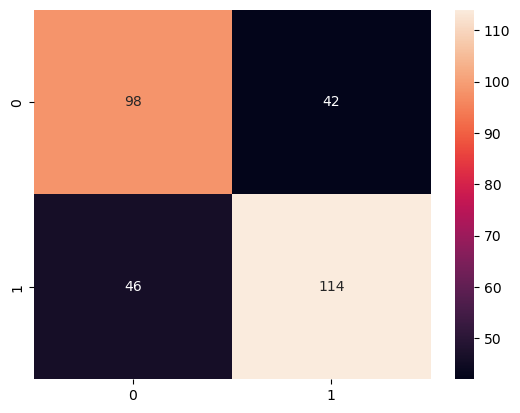

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       140
           1       0.73      0.71      0.72       160

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

